# WeatherPy

In [7]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data_cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

# Perform API Calls

In [9]:
#Perform a weather check on each city using a series of successive API calls.
city_df = []
record = 0
count = 1

print('Beginning Data Retrieval')
print('------------------------')

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={api_key}&q="

for city in cities:

    # Get weather data
    try:
        response = requests.get(query_url + city).json()
        
        country = response['sys']['country']
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp_max']
        wind = response['wind']['speed']
        clouds = response['clouds']['all']
        humidity = response['main']['humidity']
        datetime = response['dt']
        
        city_df.append({'City': city,
                            'Country': country,
                            'Lat': lat,
                            'Lng': long,
                            'Max Temp': temp,
                            'Wind Speed': wind,
                            'Cloudiness': clouds,
                            'Humidity': humidity,
                            'Date': datetime})
    
        if record == 50:
            record = 1
            count += 1
        else:
            record += 1
            
        print(f'Processing Record {record} of Set {count}|{city}')
        time.sleep(1.01)
           
    except:
        print('City not found. Skipping...')
        pass
        time.sleep(1.01)
        
print('------------------------')
print('-Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1|ribeira grande
Processing Record 2 of Set 1|gunupur
Processing Record 3 of Set 1|rikitea
Processing Record 4 of Set 1|isangel
Processing Record 5 of Set 1|geraldton
Processing Record 6 of Set 1|kodiak
Processing Record 7 of Set 1|bluff
Processing Record 8 of Set 1|atuona
Processing Record 9 of Set 1|tiksi
Processing Record 10 of Set 1|constitucion
Processing Record 11 of Set 1|hobart
City not found. Skipping...
Processing Record 12 of Set 1|shimoda
Processing Record 13 of Set 1|fortuna
Processing Record 14 of Set 1|saint-philippe
Processing Record 15 of Set 1|kargasok
Processing Record 16 of Set 1|iqaluit
Processing Record 17 of Set 1|brae
Processing Record 18 of Set 1|port alfred
Processing Record 19 of Set 1|longyearbyen
Processing Record 20 of Set 1|araouane
City not found. Skipping...
Processing Record 21 of Set 1|rosetta
Processing Record 22 of Set 1|nelson bay
Processing Record 23 of Set 1|hermanus
Pro

City not found. Skipping...
Processing Record 44 of Set 4|torbay
City not found. Skipping...
Processing Record 45 of Set 4|poddorye
Processing Record 46 of Set 4|provideniya
Processing Record 47 of Set 4|kirakira
Processing Record 48 of Set 4|malinovoye ozero
Processing Record 49 of Set 4|simao
Processing Record 50 of Set 4|kenora
Processing Record 1 of Set 5|port keats
Processing Record 2 of Set 5|bengkulu
Processing Record 3 of Set 5|puerto colombia
City not found. Skipping...
Processing Record 4 of Set 5|bouake
Processing Record 5 of Set 5|sri aman
Processing Record 6 of Set 5|ahmadpur sial
Processing Record 7 of Set 5|ilulissat
Processing Record 8 of Set 5|faanui
Processing Record 9 of Set 5|georgetown
Processing Record 10 of Set 5|mendi
Processing Record 11 of Set 5|codrington
Processing Record 12 of Set 5|lagoa
Processing Record 13 of Set 5|carlsbad
Processing Record 14 of Set 5|kiunga
Processing Record 15 of Set 5|birjand
Processing Record 16 of Set 5|moron
Processing Record 17 

Processing Record 43 of Set 8|nyalikungu
Processing Record 44 of Set 8|khandyga
Processing Record 45 of Set 8|aasiaat
Processing Record 46 of Set 8|tilichiki
City not found. Skipping...
Processing Record 47 of Set 8|salalah
Processing Record 48 of Set 8|vanimo
Processing Record 49 of Set 8|kaga
Processing Record 50 of Set 8|vostok
Processing Record 1 of Set 9|mount isa
Processing Record 2 of Set 9|tezu
Processing Record 3 of Set 9|fort nelson
Processing Record 4 of Set 9|lipin bor
Processing Record 5 of Set 9|kilindoni
City not found. Skipping...
Processing Record 6 of Set 9|balkhash
Processing Record 7 of Set 9|ayan
Processing Record 8 of Set 9|broome
Processing Record 9 of Set 9|hameenlinna
Processing Record 10 of Set 9|bulawayo
Processing Record 11 of Set 9|puerto quijarro
Processing Record 12 of Set 9|douentza
Processing Record 13 of Set 9|barranca
Processing Record 14 of Set 9|deputatskiy
Processing Record 15 of Set 9|nkhata bay
Processing Record 16 of Set 9|trapani
Processing Rec

# Convert Raw Data to DataFrame

In [10]:
#Display the dataframe
city_df = pd.DataFrame(city_df)
city_df

,City,Country,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity,Date
0,ribeira grande,PT,38.5167,-28.7000,62.60,16.11,75,94,1619912238
1,gunupur,IN,19.0833,83.8167,76.96,0.34,2,83,1619912517
2,rikitea,PF,-23.1203,-134.9692,75.67,8.52,93,80,1619911979
3,isangel,VU,-19.5500,169.2667,78.80,9.22,90,78,1619912520
4,geraldton,AU,-28.7667,114.6000,50.00,6.91,72,66,1619912521
...,...,...,...,...,...,...,...,...,...
548,sailana,IN,23.4667,74.9167,80.92,7.14,93,34,1619913321
549,ketchikan,US,55.3422,-131.6461,46.60,3.29,96,91,1619913322
550,mungwi,ZM,-10.1732,31.3694,61.86,3.91,95,96,1619913323
551,ponta delgada,PT,37.7333,-25.6667,59.00,14.97,75,100,1619913325


In [11]:
# Export the city data into a .csv.
city_df.to_csv('output_data_cities.csv', encoding='utf-8',index=False)

# Inspect the data and remove the cities where the humidity >%100



In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = city_df[city_df['Humidity'] > 100]
                        
humidity_over

,City,Country,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity,Date


# Plotting the Data



In [ ]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

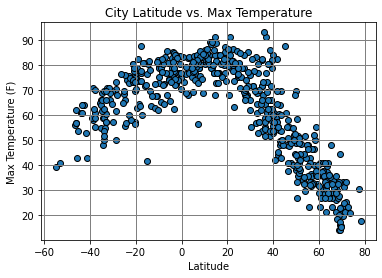

In [13]:
# Plot
plt.scatter(city_df['Lat'], city_df['Max Temp'], edgecolors='black')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

# Latitude vs. Humidity Plot

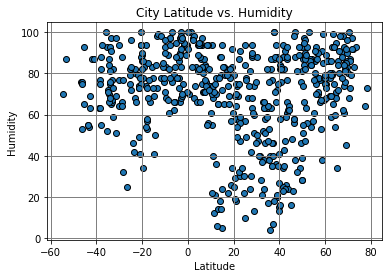

In [14]:
# Plot
plt.scatter(city_df['Lat'], city_df['Humidity'], edgecolors='black')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

# Latitude vs. Cloudiness Plot

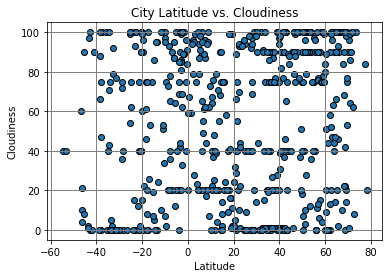

In [15]:
# Plot
plt.scatter(city_df['Lat'], city_df['Cloudiness'], edgecolors='black')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

# Latitude vs. Wind Speed Plot

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

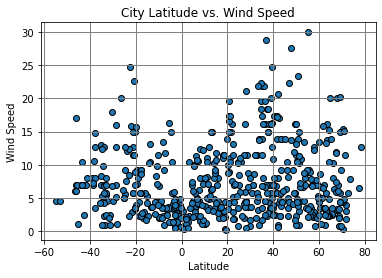

In [16]:
# Plot
plt.scatter(city_df['Lat'], city_df['Wind Speed'], edgecolors='black')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

# Linear Regression

In [17]:
northern_hemisphere = city_df[city_df['Lat'] >= 0]

southern_hemisphere = city_df[city_df['Lat'] < 0]

southern_hemisphere

,City,Country,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity,Date
2,rikitea,PF,-23.1203,-134.9692,75.67,8.52,93,80,1619911979
3,isangel,VU,-19.5500,169.2667,78.80,9.22,90,78,1619912520
4,geraldton,AU,-28.7667,114.6000,50.00,6.91,72,66,1619912521
6,bluff,NZ,-46.6000,168.3333,55.99,5.99,60,76,1619912233
7,atuona,PF,-9.8000,-139.0333,79.39,6.82,2,68,1619912238
...,...,...,...,...,...,...,...,...,...
535,mazagao,BR,-0.1150,-51.2894,77.00,3.44,20,100,1619913303
540,newcastle,AU,-32.9272,151.7765,69.80,6.91,92,73,1619913310
542,chicama,PE,-7.8447,-79.1469,64.40,9.22,40,94,1619913313
545,samarai,PG,-10.6167,150.6667,81.09,9.75,34,78,1619913098


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.801431527634622


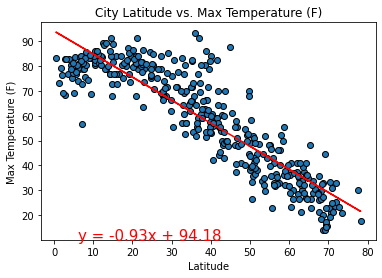

In [18]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48178896865977894


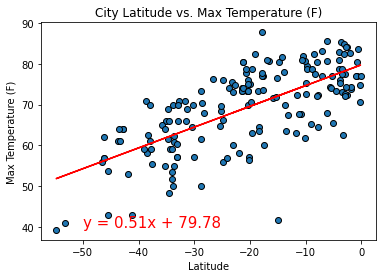

In [19]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.02822026622678243


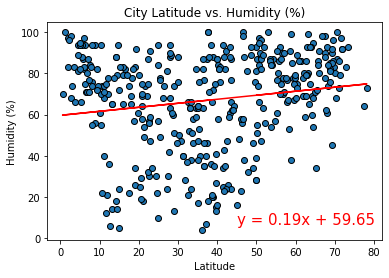

In [20]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,7),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The r-squared is: 0.08403817327650202


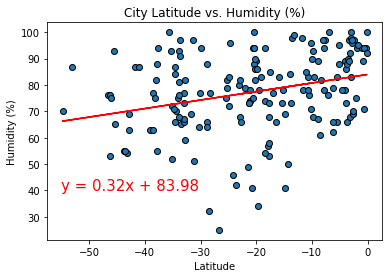

In [21]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-55,40),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019039943431484994


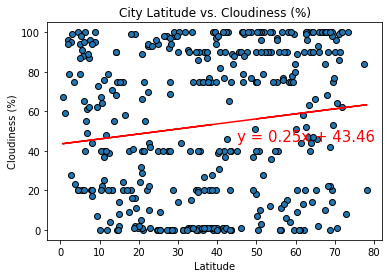

In [22]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(45,45),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06229801625014593


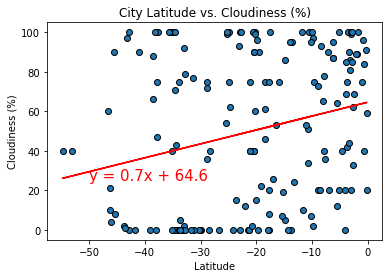

In [23]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003707180365191901


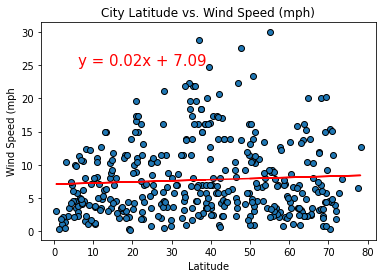

In [24]:
# Print out the r-squared value along with the plot.
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(6,25),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('City Latitude vs. Wind Speed (mph)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05979967422284994


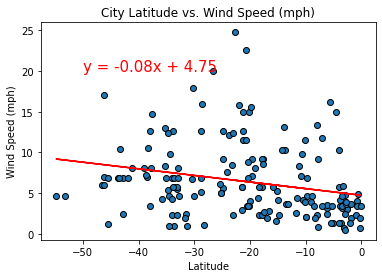

In [25]:
# Print out the r-squared value along with the plot.
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')

# Format scatter plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

# Observable Trends

While temperature had a high correlation to distance from the equator humidity, cloudiness, and wind speed were more evenly distributed regardless of equator location.

There are significantly more data points to study in the northern hemisphere as opposed to the southern hemisphere.

Very few cities with negative lattitudes had a humidity percentage below 40%.  Lattitudes above 0 were much more likely to have a lower humidity percentage.